In [ ]:
import requests
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns

In [ ]:
# 발매금액정보
url4 = 'http://apis.data.go.kr/B551015/API208_1/BetwindowMgt_1'
df4 = pd.DataFrame()
months = ['01','02','03','04','05','06','07','08','09','10','11','12']
for i in range(2015,2025,1):
  for j in months:
    params = {
      'ServiceKey': 'ueiv5ABUpEaRdRQ1C8eIPrxhbLttEBKXzDm2/EGV+iugf+vy9fU+nJSDHDvHskISWyE6CtLZHOjoFELH7/swpw==',
      'numOfRows': '100000',
      'pageNo': '1',
      'sale_race': '01',
      'rc_month' : str(i)+j
    }
    response4 = requests.get(url4, params=params)
    try:
        dftemp4 = pd.DataFrame(pd.read_xml(response4.text, xpath='.//item'))
        df4 = pd.concat([df4,dftemp4], ignore_index=True)
    except:
        pass
    # print(str(i)+j," : ", len(dftemp4))

df4.count()
# df4.head()
# print(len(df1))
# df1['rcDate'].value_counts(sort=False)
# response
# <cancelCount>0</cancelCount>
# <cancelValue>0</cancelValue>
# <divisionName>놀라운지</divisionName>
# <payoffCount>77</payoffCount>
# <payoffValue>6713470</payoffValue>
# <performRacecourseName>제주</performRacecourseName>
#   <raceDate>20200222</raceDate>
# <refundCount>0</refundCount>
# <refundValue>0</refundValue>
#   <saleCount>859</saleCount>
# <saleRacecourseName>서울</saleRacecourseName>
# <saleValue>6659400</saleValue>
# <typeName>현금자동</typeName>
# <windowCount>45</windowCount>

201501  :  10275
201502  :  7114
201503  :  10408
201504  :  9800
201505  :  12608
201506  :  10508
201507  :  10481
201508  :  11831
201509  :  8499
201510  :  12857
201511  :  11919
201512  :  10076
201601  :  14716
201602  :  9559
201603  :  12765
201604  :  14785
201605  :  13831
201606  :  12960
201607  :  15287
201608  :  10977
201609  :  11022
201610  :  15360
201611  :  11412
201612  :  11598
201701  :  7199
201702  :  10812
201703  :  11762
201704  :  12894
201705  :  11025
201706  :  11833
201707  :  12196
201708  :  9385
201709  :  13061
201710  :  9164
201711  :  11008
201712  :  12043
201801  :  9967
201802  :  8160
201803  :  12581
201804  :  11787
201805  :  11360
201806  :  13169
201807  :  11383
201808  :  10372
201809  :  10528
201810  :  11427
201811  :  12294
201812  :  11452
201901  :  10423
201902  :  8390
201903  :  13658
201904  :  10970
201905  :  11798
201906  :  12809
201907  :  11074
201908  :  12246
201909  :  10296
201910  :  12807
201911  :  14835
201912 

cancelCount              1004880
cancelValue              1004880
divisionName             1004880
payoffCount              1004880
payoffValue              1004880
performRacecourseName    1004880
raceDate                 1004880
refundCount              1004880
refundValue              1004880
saleCount                1004880
saleRacecourseName       1004880
saleValue                1004880
typeName                 1004880
windowCount              1004880
dtype: int64

In [ ]:
df4.loc[df4.raceDate == 20150102]
# data1 = df1.groupby('rcDate')['rcNo'].nunique().reset_index()
# data4 = df4.groupby('raceDate')['saleCount','saleValue','cancelCount','cancelValue'].reset_index()
data4 = df4.groupby('raceDate').agg({"saleCount":"sum","saleValue":"sum","cancelCount":"sum","cancelValue":"sum"}).reset_index()
data4['RealSaleCount'] = data4['saleCount'] - data4['cancelCount']
data4['RealSaleValue'] = data4['saleValue'] - data4['cancelValue']
data4 = data4[['raceDate','RealSaleCount','RealSaleValue']]
data4['raceDate'] = data4['raceDate'].astype(str)
data4['raceDate'] = pd.to_datetime(data4['raceDate'])
data4

,raceDate,RealSaleCount,RealSaleValue
0,2015-01-02,2580080,34377273100
1,2015-01-03,3754651,47873185400
2,2015-01-04,4588882,61660291500
3,2015-01-09,2293472,30830172500
4,2015-01-10,3572460,48466962900
...,...,...,...
1339,2024-05-25,4170647,36982373800
1340,2024-05-26,5409554,54141363700
1341,2024-05-31,2844747,23775865000
1342,2024-06-01,4310218,39153784100


<Axes: xlabel='raceDate', ylabel='RealSaleCount'>

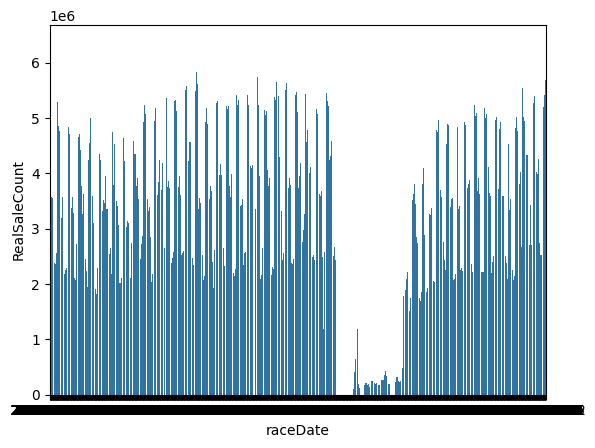

In [ ]:
# data4.plot(y=['RealSaleCount', 'RealSaleValue'])
sns.barplot(data=data4, x="raceDate", y='RealSaleCount')
# sns.barplot(data=data4, x="raceDate", y='RealSaleValue')
# data44 = data4.groupby('raceDate').agg({"saleCount":"sum","saleValue":"sum","cancelCount":"sum","cancelValue":"sum"}).reset_index()

<BarContainer object of 1344 artists>

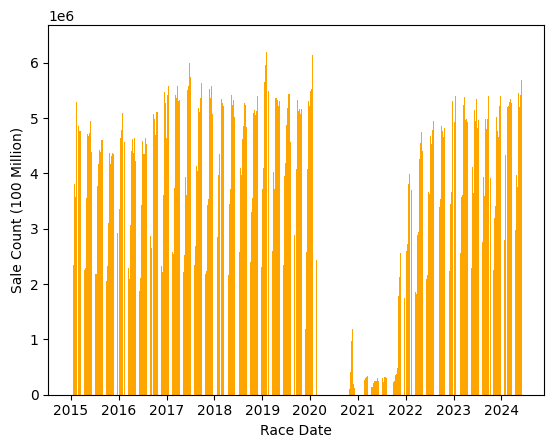

In [ ]:
data44 = pd.pivot_table(data4, index=['raceDate'])
# data44[['RealSaleCount','RealSaleValue']].plot(kind='bar', stacked = True)

xs=data4['raceDate'].to_list()			#dy_day(데이터 프레임)의 index(날짜, 시간)를 리스트로 저장
# ys=data4['RealSaleValue'].to_list()			#dy_day(테이터 프레임)의 volume 필드를 리스트로 저장
ys=data4['RealSaleCount'].to_list()			#dy_day(테이터 프레임)의 volume 필드를 리스트로 저장

# plt.figure(figsize=(10, 6))			#그래프 크기 지정
plt.xlabel('Race Date')				#그래프 x축 이름(label) 지정
plt.ylabel('Sale Count (100 Million)')				#그래프 y축 이름(label) 지정
plt.bar(xs, ys, color='Orange', width=3.0)

,RealSaleCount,RealSaleValue
raceDate,,
2015-01-02,2580080,34377273100
2015-01-03,3754651,47873185400
2015-01-04,4588882,61660291500
2015-01-09,2293472,30830172500
2015-01-10,3572460,48466962900
...,...,...
2024-05-25,4170647,36982373800
2024-05-26,5409554,54141363700
2024-05-31,2844747,23775865000


In [ ]:
# api1 : 경주기록 정보
url1 = 'http://apis.data.go.kr/B551015/API4_3/raceResult_3'

df1 = pd.DataFrame()
for i in range(2012,2024,1):
    params = {
      'ServiceKey': 'ueiv5ABUpEaRdRQ1C8eIPrxhbLttEBKXzDm2/EGV+iugf+vy9fU+nJSDHDvHskISWyE6CtLZHOjoFELH7/swpw==',
      'numOfRows': '100000',
      'pageNo': '1',
      'meet': '1',
      'rc_year' : i
    }
    response1 = requests.get(url1, params=params)
    dftemp1 = pd.DataFrame(pd.read_xml(response1.text, xpath='.//item'))
    # print(i," : ", len(dftemp1))
    df1 = pd.concat([df1,dftemp1], ignore_index=True)
    # df1.count()

print(len(df1))
df1['rcDate'].value_counts(sort=False)

140457


rcDate
20121223    183
20121222    148
20121216    150
20121215    158
20121209    126
           ... 
20230128    142
20230115    129
20230114    139
20230108    131
20230107    142
Name: count, Length: 1106, dtype: int64

In [ ]:
# api2 : 경주마 정보
url2 = 'http://apis.data.go.kr/B551015/horseinfohi/gethorseinfohi'

df2 = pd.DataFrame()

for i in range(0,1,1):
    params = {
      'ServiceKey': 'ueiv5ABUpEaRdRQ1C8eIPrxhbLttEBKXzDm2/EGV+iugf+vy9fU+nJSDHDvHskISWyE6CtLZHOjoFELH7/swpw==',
      'numOfRows': '100000',
      'pageNo': '1',
      'reg_dt_fr' : '20120101',
      'reg_dt_to': '20241231'
    }
    response2 = requests.get(url2, params=params)
    dftemp2 = pd.DataFrame(pd.read_xml(response2.text, xpath='.//item'))
    # print(i," : ", len(dftemp2))
    df2 = pd.concat([df2,dftemp2], ignore_index=True)
    # df2.count()

print(len(df2))
df2.head()


24091


,bldlnRegDt,bredgRegDt,damHrnm,etcChticTxt,fdtRegDt,foalgDt,gndrNm,horseCtcolNm,hrnmGrtDt,hrno,...,passport,pctyNm,ppseNm,prodNm,rchrRegCnclDt,rchrRegDt,sireHrnm,sitlNm,spcsNm,studbook
0,-,-,GROUP TEXT,-,-,2022-05-09(2세),수,회색,2023-12-01,54701,...,-,미국,경주용,-,-,2024-05-30,GIFT BOX,서울경마공원,더러브렛,American Stud Book 제32권
1,2021-07-15,-,-,-,-,2021-05-26(3세),암,밤,2023-12-06,3103409,...,-,한국,용도미정(휴양),-,2024-04-25,2023-12-06,-,-,제주마,-
2,2021-07-15,-,-,-,-,2021-03-20(3세),암,회,2023-12-06,3103950,...,-,한국,경주용,-,-,2023-12-06,-,-,제주마,-
3,2021-05-06,-,-,-,-,2021-04-01(3세),암,회,2024-01-03,3103891,...,-,한국,경주용,-,-,2024-01-03,-,-,제주마,-
4,-,-,AD LITEM,-,-,2022-02-05(2세),수,흑갈색,2024-02-15,54781,...,-,미국,경주용,-,-,2024-03-21,CROSS TRAFFIC,서울경마공원,더러브렛,American Stud Book 제32권


In [ ]:
# api3 : 경주 훈련 정보
url3 = 'http://apis.data.go.kr/B551015/API22_1/startingTranning_1'

df3 = pd.DataFrame()

for i in range(2012,2025,1):
    params = {
      'ServiceKey': 'ueiv5ABUpEaRdRQ1C8eIPrxhbLttEBKXzDm2/EGV+iugf+vy9fU+nJSDHDvHskISWyE6CtLZHOjoFELH7/swpw==',
      'numOfRows': '100000',
      'pageNo': '1',
      'meet': '1',
      'tr_year' : i
    }
    response3 = requests.get(url3, params=params)
    dftemp3 = pd.DataFrame(pd.read_xml(response3.text, xpath='.//item'))
    # print(i," : ", len(dftemp3))
    df3 = pd.concat([df3,dftemp3], ignore_index=True)
    # df3.count()

print(len(df3))
df3.head()

166436


,hrName,hrNo,meet,part,partNo,prName,remark,trDate
0,파티레이나,28740,서울,6.0,신마,문정균(기수),양호,20121221
1,일기가성,28837,서울,10.0,8,장세현(조교승인),양호,20121221
2,더센왕,27905,서울,15.0,신마,이제충(조교승인),출발불량,20121221
3,정상대로,28528,서울,15.0,5,김효석(조교승인),양호,20121221
4,오리엔탈패스,27730,서울,18.0,18,박상우(기수),양호,20121221


<BarContainer object of 145244 artists>

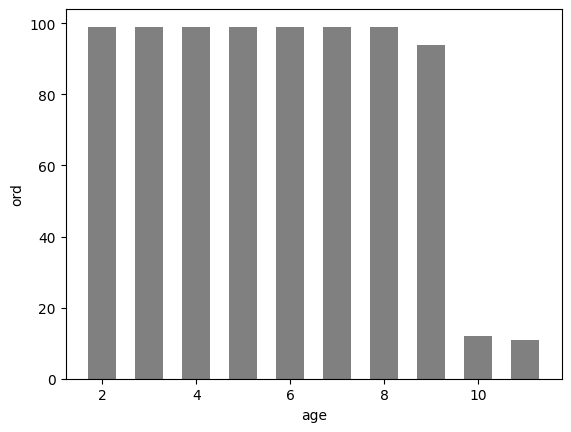

In [ ]:
data1 = df1[['age','ord']]
# data1.head()
# temp = data1.groupby(data1['rcDate'])['rcNo'].size()
# temp.head()
# df1.plot(kind='bar', y=['rcNo'])
xs=data1['age'].to_list()			#dy_day(데이터 프레임)의 index(날짜, 시간)를 리스트로 저장
ys=data1['ord'].to_list()			#dy_day(테이터 프레임)의 volume 필드를 리스트로 저장

# plt.figure(figsize=(10, 6))			#그래프 크기 지정
plt.xlabel('age')				#그래프 x축 이름(label) 지정
plt.ylabel('ord')				#그래프 y축 이름(label) 지정

plt.bar(xs, ys, width=0.6, color='grey')




<BarContainer object of 955 artists>

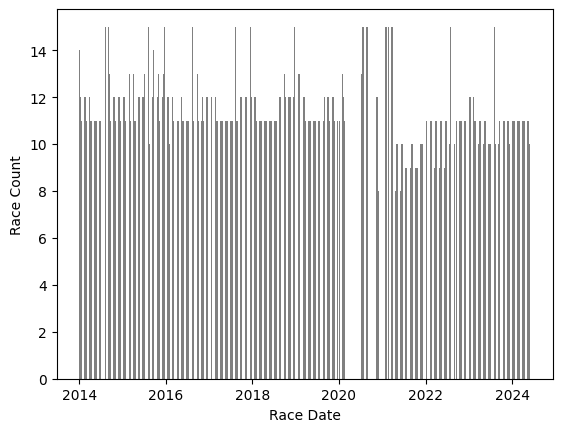

In [ ]:
data1 = df1.groupby('rcDate')['rcNo'].nunique().reset_index()

# plt.xticks(rotation=90)
data1['rcDate'] = data1['rcDate'].astype(str)
data1['rcDate'] = pd.to_datetime(data1['rcDate'])
# data1.dtypes
# data1.head()
# data1.plot(kind='bar', xlabel='rcDate', figsize=(15, 5), rot=45)
# data1.head().plot.bar(x='rcDate', y='rcNo', rot=90, fontsize=5)
# sns.barplot(data=data1, x="rcDate", y="rcNo")
# sns.lineplot(data=data1, x="rcDate", y="rcNo")


xs=data1['rcDate'].to_list()			#dy_day(데이터 프레임)의 index(날짜, 시간)를 리스트로 저장
ys=data1['rcNo'].to_list()			#dy_day(테이터 프레임)의 volume 필드를 리스트로 저장

# plt.figure(figsize=(10, 6))			#그래프 크기 지정
plt.xlabel('Race Date')				#그래프 x축 이름(label) 지정
plt.ylabel('Race Count')				#그래프 y축 이름(label) 지정
plt.bar(xs, ys, color='grey', width=3.0)

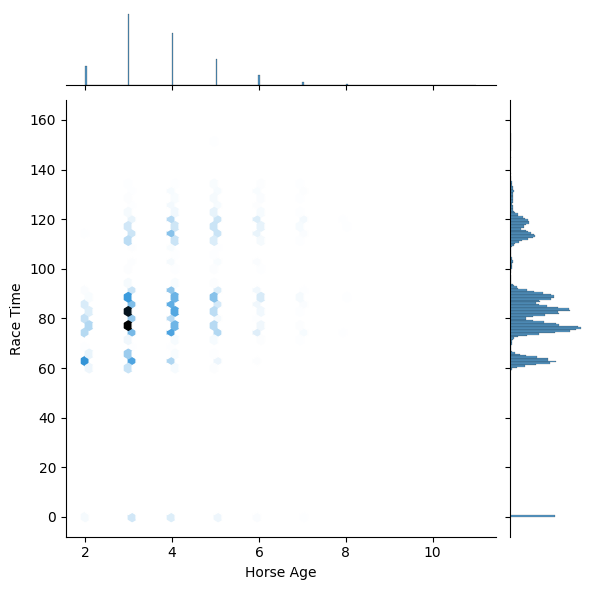

In [ ]:
# sns.jointplot(data=df1, x='wgHr', y='rcTime')
dfdf22 = df1.loc[df1.rcTime > 0]
hexbin = sns.jointplot(data=dfdf22, x='age', y='rcTime', kind='hex')
hexbin.set_axis_labels(xlabel='Horse Age', ylabel='Race Time')

rcDate
Saturday    59272
Sunday      58679
Friday       1469
Monday        229
Name: count, dtype: int64


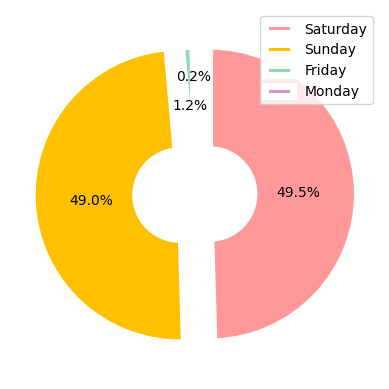

In [ ]:
df1['rcDate'] = df1['rcDate'].astype(str)
df1['rcDate'] = pd.to_datetime(df1['rcDate'])
tempdf = df1['rcDate'].dt.day_name()
print(tempdf.value_counts())
td = tempdf.value_counts().reset_index()
td
# rc = sns.barplot(data=td, y="rcDate", x="count", orient='h')
# tempdf = df1.groupby('rcDate')['rcDate'].dt.day_name().nunique().reset_index()
# data1 = df1.groupby('rcDate')['rcNo'].nunique().reset_index()
# rc.set(ylabel="Day", xlabel="# of Games")

explode = [0.1, 0.1, 0, 0.2]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(td['count'], autopct='%.1f%%', startangle=90, explode=explode, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.legend(td['rcDate'])
plt.show()

In [ ]:
print("Data Count : ",len(df1))
print("\nDTypes")
print(df1.dtypes)

Data Count :  119649

DTypes
age               int64
ageCond          object
buG1fAccTime      int64
buG1fOrd          int64
buG2fAccTime      int64
                 ...   
weather          object
wgBudam         float64
wgHr             object
winOdds         float64
sexCond          object
Length: 89, dtype: object


Text(0, 0.5, 'Betting Odds')

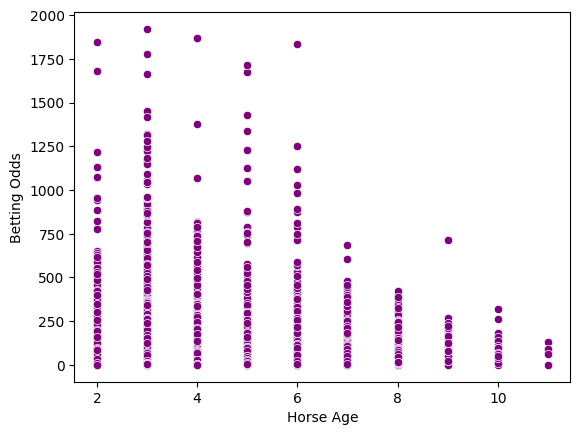

In [ ]:
# print(df1[['track','weather']])
# print(df1[['age','winOdds']])
dfdf = df1.loc[df1.winOdds < 2000]
wo = sns.scatterplot(data=dfdf, x='age', y='winOdds', color='purple')
# wo = sns.barplot(data=dfdf, x='age', y='winOdds', color='purple')
plt.xlabel('Horse Age')
plt.ylabel('Betting Odds')

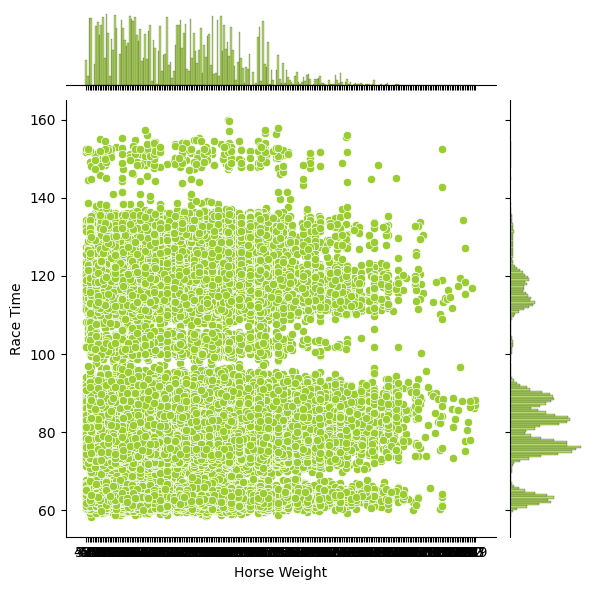

In [ ]:
dfdf11 = df1[['wgHr','rcTime']]
dfdf11 = dfdf11.loc[dfdf11.rcTime > 0]
dfdf11['wgHr'] = dfdf11['wgHr'].replace(regex=r'\(.*\)', value='')
dfdf11
# hexhex = sns.jointplot(data=dfdf11, x='wgHr', y='rcTime')
hexhex = sns.jointplot(data=dfdf11, x='wgHr', y='rcTime', color='yellowgreen')
# hexhex = sns.jointplot(data=dfdf11, x='wgHr', y='rcTime', kind='kde')
hexhex.set_axis_labels(xlabel='Horse Weight', ylabel='Race Time')

<ipython-input-93-9a646de3119e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdf11['rcDist'] = dfdf11['rcDist'].astype('int')


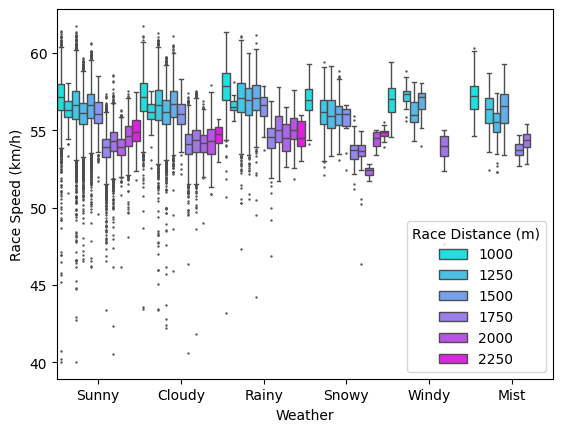

In [ ]:
dfdf11 = df1[['rcDist','weather','rcTime']]
dfdf11 = dfdf11.dropna(subset=['rcDist'])
dfdf11['rcDist'] = dfdf11['rcDist'].astype('int')
dfdf11 = dfdf11.loc[dfdf11.weather != '-']
dfdf11 = dfdf11.loc[dfdf11.rcTime > 0]
dfdf11['speed'] = (dfdf11['rcDist']/dfdf11['rcTime']) * 3.6
# aa = dfdf11.groupby(['rcDist','weather']).agg({'rcTime':'mean'}).reset_index()
map = {'맑음':'Sunny','흐림':'Cloudy','비':'Rainy','눈':'Snowy','안개':'Mist','강풍':'Windy'}
dfdf11['weather']=dfdf11['weather'].map(map.get)
dfdf11 = dfdf11.loc[dfdf11.speed > 40]
dfdf11=dfdf11.rename(columns={'rcDist':'Race Distance (m)'})
plt.xlabel('Weather')
plt.ylabel('Race Speed (km/h)')
bb = sns.boxplot(data=dfdf11, x='weather', y='speed', palette='cool', order=['Sunny', 'Cloudy', 'Rainy', 'Snowy','Windy','Mist'], hue='Race Distance (m)', width=1.0, fliersize=0.7)

Text(0, 0.5, 'Race Time (sec)')

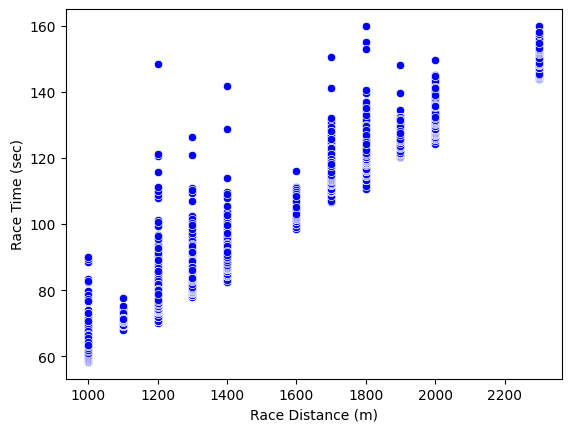

In [ ]:
df1 = df1.loc[df1.rcTime > 0]
bb = sns.scatterplot(data=df1, x='rcDist', y='rcTime', color='blue')
plt.xlabel('Race Distance (m)')
plt.ylabel('Race Time (sec)')

<Axes: xlabel='hrNo', ylabel='chaksun1'>

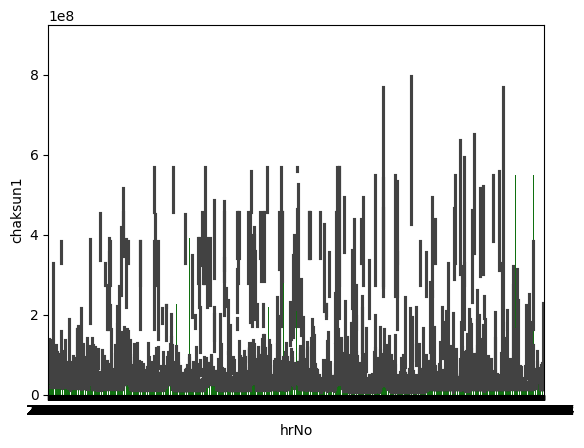

In [ ]:
# df1['jkNo'] = df1['jkNo'].str.extract(r'(\d+)')
df1 = df1.loc[df1.rcTime > 0]
df1['wgBudam'].value_counts()
# df1.loc[df1.jkNo > 0]
sns.barplot(data=df1, x='hrNo', y='chaksun1', color='green')


In [ ]:
data1 = df1[[
    'hrNo','hrName','name','age','sex','wgHr','wgBudam','rating','jkNo','jkName',
    'trNo','trName','owNo','owName','rcTime','weather','track',
    'meet','rcDate','rcDist','ord','chaksun1','chaksun2','chaksun3','chaksun4','chaksun5'
]]
columns_to_delete = ['name','owNo','owName','jkNo','jkName','trNo','trName','chaksun1','chaksun2','chaksun3','chaksun4','chaksun5']
data1 = data1.drop(columns=columns_to_delete)

data1.tail()
print(len(data1))
# print(data['rating'].value_counts())



145244


In [ ]:
data2 = df2[[
    'hrno','damHrnm','foalgDt','gndrNm','horseCtcolNm','hrsBodyChticTxt','hrsHeadChticTxt','hrsNeckChticTxt','pctyNm','ppseNm','spcsNm'
    ]]

data2.head()
print(len(data2))
# print(data2['hrno'].value_counts(ascending=True))



24065


In [ ]:
data3 = df3[[
    'hrNo','hrName','meet','remark','trDate'
    ]]

data3.head()
df3.head()
# print(len(data3))
# print(data3['hrNo'].value_counts(ascending=True))


,hrName,hrNo,meet,part,partNo,prName,remark,trDate
0,파티레이나,28740,서울,6.0,신마,문정균(기수),양호,20121221
1,일기가성,28837,서울,10.0,8,장세현(조교승인),양호,20121221
2,더센왕,27905,서울,15.0,신마,이제충(조교승인),출발불량,20121221
3,정상대로,28528,서울,15.0,5,김효석(조교승인),양호,20121221
4,오리엔탈패스,27730,서울,18.0,18,박상우(기수),양호,20121221


In [ ]:
race_info = data1[['hrNo','hrName','age','sex','wgHr','rating','rcDate','rcDist','meet','track','weather','rcTime','ord']]
horse_info = data2


In [ ]:
race_info['track'] = race_info['track'].str[:2]
race_info['wgHr'] = race_info['wgHr'].replace(regex=r'\(.*\)', value='')
race_info = race_info.drop_duplicates()
# print(race_info['rcDate'].value_counts())
print(race_info['rcDate'].count())
race_info.head()

<ipython-input-9-628a6500ec99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_info['track'] = race_info['track'].str[:2]


145244


<ipython-input-9-628a6500ec99>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_info['wgHr'] = race_info['wgHr'].replace(regex=r'\(.*\)', value='')


,hrNo,hrName,age,sex,wgHr,rating,rcDate,rcDist,meet,track,weather,rcTime,ord
0,24091,애니위너,4,암,482,0,20121223,1300.0,서울,포화,맑음,83.5,1
1,26288,레이카,3,암,481,0,20121223,1300.0,서울,포화,맑음,84.2,2
2,26331,실크포리스트,3,암,440,0,20121223,1300.0,서울,포화,맑음,84.2,3
3,26729,임자도,3,암,448,0,20121223,1300.0,서울,포화,맑음,84.2,4
4,27007,라스트러브,3,암,487,0,20121223,1300.0,서울,포화,맑음,84.8,5


In [ ]:
horse_info=horse_info.rename(columns={'hrno':'hrNo','damHrnm':'hrName'})
horse_info.head()
# len(horse_info)

,hrNo,hrName,foalgDt,gndrNm,horseCtcolNm,hrsBodyChticTxt,hrsHeadChticTxt,hrsNeckChticTxt,pctyNm,ppseNm,spcsNm
0,3103409,-,2021-05-26(3세),암,밤,",,,,,,,","가운데이마,,,,,,,","목줄,양쪽갈기,,,,,,",한국,용도미정(휴양),제주마
1,3103950,-,2021-03-20(3세),암,회,",,,,,,,","가운데이마,,,,,,,","양쪽목밑,,,,,,,",한국,경주용,제주마
2,3103891,-,2021-04-01(3세),암,회,",,,,,,,","윗이마,,,,,,,","목밑,,,,,,,",한국,경주용,제주마
3,54781,AD LITEM,2022-02-05(2세),수,흑갈색,-,이마가마중,"우갈기가마, 목줄가마",미국,경주용,더러브렛
4,54783,AWESOMETASTIC,2022-04-22(2세),수,갈색,-,"이마가마중, 유성",긴목줄가마,미국,경주용,더러브렛


In [ ]:
horse_train = data3[['hrNo','hrName','meet','remark','trDate']]
horse_train = horse_train.sort_values(by=['trDate'], ascending=False)
horse_train = horse_train.drop_duplicates(['hrNo'], keep='first')
print(len(horse_train))
horse_train
# horse_train.dtypes

NameError: name 'data3' is not defined

In [ ]:
horse_train = df3.sort_values(by=['trDate'], ascending=False)
horse_train = horse_train.drop_duplicates(['hrNo'], keep='first')

df13 = pd.merge(left=df1, right=horse_train, how='left', on='hrNo')
# df13.loc[df13.trDate > 0]

# df13['trDate'] = df13['trDate'].fillna(19000101)
df13.dropna(subset=['trDate'], inplace=True)
# df13[df13.trDate.isna()]
df13['rcDate'] = df13['rcDate'].astype(str)
df13['rcDate'] = pd.to_datetime(df13['rcDate'])
df13['trDate'] = df13['trDate'].astype(int)
df13['trDate'] = df13['trDate'].astype(str)
df13['trDate'] = pd.to_datetime(df13['trDate'])
df13['DaySinceTrain'] = '0'
df13['DaySinceTrain'] = (df13['rcDate'] - df13['trDate']).dt.days

# df13['DaySinceTrain'] = np.where(df13['DaySinceTrain'] > 40000, -1,df13['DaySinceTrain'])
df13.head()

,age,ageCond,buG1fAccTime,buG1fOrd,buG2fAccTime,buG2fOrd,buG3fAccTime,buG3fOrd,buG4fAccTime,buG4fOrd,...,winOdds,sexCond,hrName_y,meet_y,part,partNo,prName,remark,trDate,DaySinceTrain
0,3,3세이상,0,0,0,0,0,0,0,0,...,6.5,None,스트롱샤인,서울,27.0,38,빅투아르(기수),양호,2019-08-16,-1692
1,3,3세이상,0,0,0,0,0,0,0,0,...,4.2,None,장산불패,서울,32.0,13,정필화(조교승인),양호,2017-03-16,-809
2,2,3세이상,0,0,0,0,0,0,0,0,...,3.5,None,온에어,서울,20.0,9,안효리(기수),양호,2014-11-27,31
3,2,3세이상,0,0,0,0,0,0,0,0,...,157.2,None,빌리브유,서울,19.0,16,윤황석(조교승인),양호,2016-03-10,-438
4,2,3세이상,0,0,0,0,0,0,0,0,...,155.7,None,타라니스,서울,35.0,31,김진규(조교승인),주립불량,2016-06-30,-550


In [ ]:
df133 = df13[['ord','rcDate','trDate','DaySinceTrain']]
df133.loc[df133.DaySinceTrain < 0]

,ord,rcDate,trDate,DaySinceTrain
0,1,2014-12-28,2019-08-16,-1692
1,2,2014-12-28,2017-03-16,-809
3,4,2014-12-28,2016-03-10,-438
4,5,2014-12-28,2016-06-30,-550
5,6,2014-12-28,2015-04-16,-109
...,...,...,...,...
116997,5,2024-01-06,2024-03-28,-82
116998,6,2024-01-06,2024-05-02,-117
116999,7,2024-01-06,2024-04-25,-110
117000,8,2024-01-06,2024-04-04,-89


<Axes: xlabel='DaySinceTrain', ylabel='ord'>

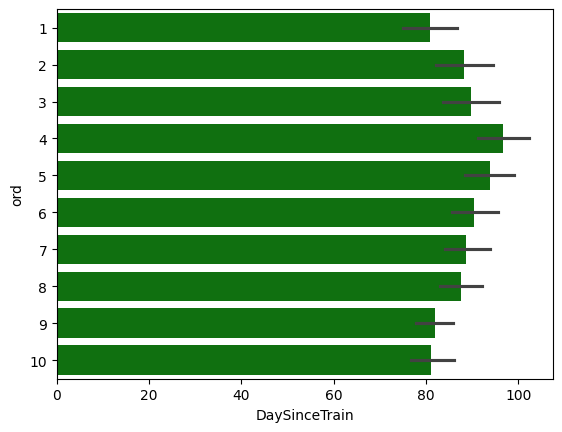

In [ ]:
df13 = df13.loc[df13.rcTime > 0]
df13 = df13.loc[df13.remark == '양호']
df13 = df13.loc[df13.DaySinceTrain > 0]
df13 = df13.loc[df13.DaySinceTrain < 365]
df13 = df13.loc[df13.ord < 11]
df13_s = df13.sort_values(by='DaySinceTrain' ,ascending=True)
# df13_s[['ord','rcTime','DaySinceTrain']]
sns.barplot(data=df13, y='ord', x='DaySinceTrain', color='green', orient='h')
# sns.lineplot(data=df13, y='DaySinceTrain', x='ord', color='green')
# plt.ylabel('Race Order')
# plt.xlabel('Days Since Last Training')

In [ ]:
df2=df2.rename(columns={'hrno':'hrNo'})
df12 = pd.merge(left=df1,right=df2,how="left", on="hrNo")
df12 = df12[['hrNo','age','rcTime','wgHr','winOdds','chaksun1','rcDate','ord','hrsBodyChticTxt','hrsHeadChticTxt','hrsNeckChticTxt']]
df12['wgHr'] = df12['wgHr'].replace(regex=r'\(.*\)', value='')
df12['wgHr'] = df12['wgHr'].replace('', 0)
df12['wgHr'] = df12['wgHr'].astype(int)
df12['features'] = df12['hrsBodyChticTxt'] + ','+ df12['hrsHeadChticTxt'] + ','+ df12['hrsNeckChticTxt']
df12['features'] = df12['features'].str.replace('-,' , '')
df12['features'] = df12['features'].str.replace(',-' , '')
df12['features'] = df12['features'].str.replace(' ' , '')
df12.drop(columns = ['hrsBodyChticTxt','hrsHeadChticTxt','hrsNeckChticTxt'], inplace=True)
df12['rcDate'] = df12['rcDate'].astype(str)
df12['rcDate'] = pd.to_datetime(df12['rcDate'])
df12 = df12.loc[df12.rcTime > 0]
df12 = df12.loc[df12.wgHr > 0]
df12 = df12.loc[df12.winOdds < 9999]
df12 = df12.loc[df12.ord < 11]
df12

,hrNo,age,rcTime,wgHr,winOdds,chaksun1,rcDate,ord,features
0,30761,3,85.2,438,6.5,16500000,2014-12-28,1,"이마가마상,곡대유성,비량대백,비백,상순대백,우갈기가마,목줄가마"
1,30329,3,85.2,527,4.2,16500000,2014-12-28,2,"이마가마중,유성"
2,31492,2,85.4,477,3.5,16500000,2014-12-28,3,"이마가마중,소유성,좌우갈기가마,긴목줄가마"
3,32617,2,85.6,468,157.2,16500000,2014-12-28,4,"이마가마하,대유성,비량대백,비대백,하순대백,목줄가마"
4,31769,2,85.9,468,155.7,16500000,2014-12-28,5,"이마가마중,유성,비량백,비백"
...,...,...,...,...,...,...,...,...,...
119849,42354,6,102.2,452,5.1,49500000,2024-01-06,5,"이마가마상,유성,비량세백,비소백,목줄가마"
119850,44553,5,102.3,495,6.8,49500000,2024-01-06,6,"좌우볼기가마,이마가마중,대유성,비량백,비백,긴목줄가마"
119851,45147,6,102.8,479,19.8,49500000,2024-01-06,7,"이마가마2(사선),대유성,비량대백,비대백,하순백,긴목줄가마"
119852,43482,7,102.9,467,6.2,49500000,2024-01-06,8,"이마가마상,유성,좌우갈기가마,목밑가마"


In [ ]:
df12 = df12.dropna(subset=['features'])
# df12[df12.features.isna()]
# df12d = pd.get_dummies(df12, columns=['features'], prefix='feature', dummy_na=True)
# df12d
df122 = pd.concat([df12,df12['features'].str.split(',' , expand=True)], axis=1)
df122.drop(columns = ['features'], inplace=True)
df122
# pd.get_dummies(df122, drop_first=True)

,hrNo,age,rcTime,wgHr,winOdds,chaksun1,rcDate,ord,0,1,...,3,4,5,6,7,8,9,10,11,12
0,30761,3,85.2,438,6.5,16500000,2014-12-28,1,이마가마상,곡대유성,...,비백,상순대백,우갈기가마,목줄가마,None,None,None,None,None,None
1,30329,3,85.2,527,4.2,16500000,2014-12-28,2,이마가마중,유성,...,None,None,None,None,None,None,None,None,None,None
2,31492,2,85.4,477,3.5,16500000,2014-12-28,3,이마가마중,소유성,...,긴목줄가마,None,None,None,None,None,None,None,None,None
3,32617,2,85.6,468,157.2,16500000,2014-12-28,4,이마가마하,대유성,...,비대백,하순대백,목줄가마,None,None,None,None,None,None,None
4,31769,2,85.9,468,155.7,16500000,2014-12-28,5,이마가마중,유성,...,비백,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119849,42354,6,102.2,452,5.1,49500000,2024-01-06,5,이마가마상,유성,...,비소백,목줄가마,None,None,None,None,None,None,None,None
119850,44553,5,102.3,495,6.8,49500000,2024-01-06,6,좌우볼기가마,이마가마중,...,비량백,비백,긴목줄가마,None,None,None,None,None,None,None
119851,45147,6,102.8,479,19.8,49500000,2024-01-06,7,이마가마2(사선),대유성,...,비대백,하순백,긴목줄가마,None,None,None,None,None,None,None
119852,43482,7,102.9,467,6.2,49500000,2024-01-06,8,이마가마상,유성,...,목밑가마,None,None,None,None,None,None,None,None,None


In [ ]:
df12.dtypes

hrNo                 int64
age                  int64
rcTime             float64
wgHr                 int64
winOdds            float64
chaksun1             int64
rcDate      datetime64[ns]
ord                  int64
features            object
dtype: object

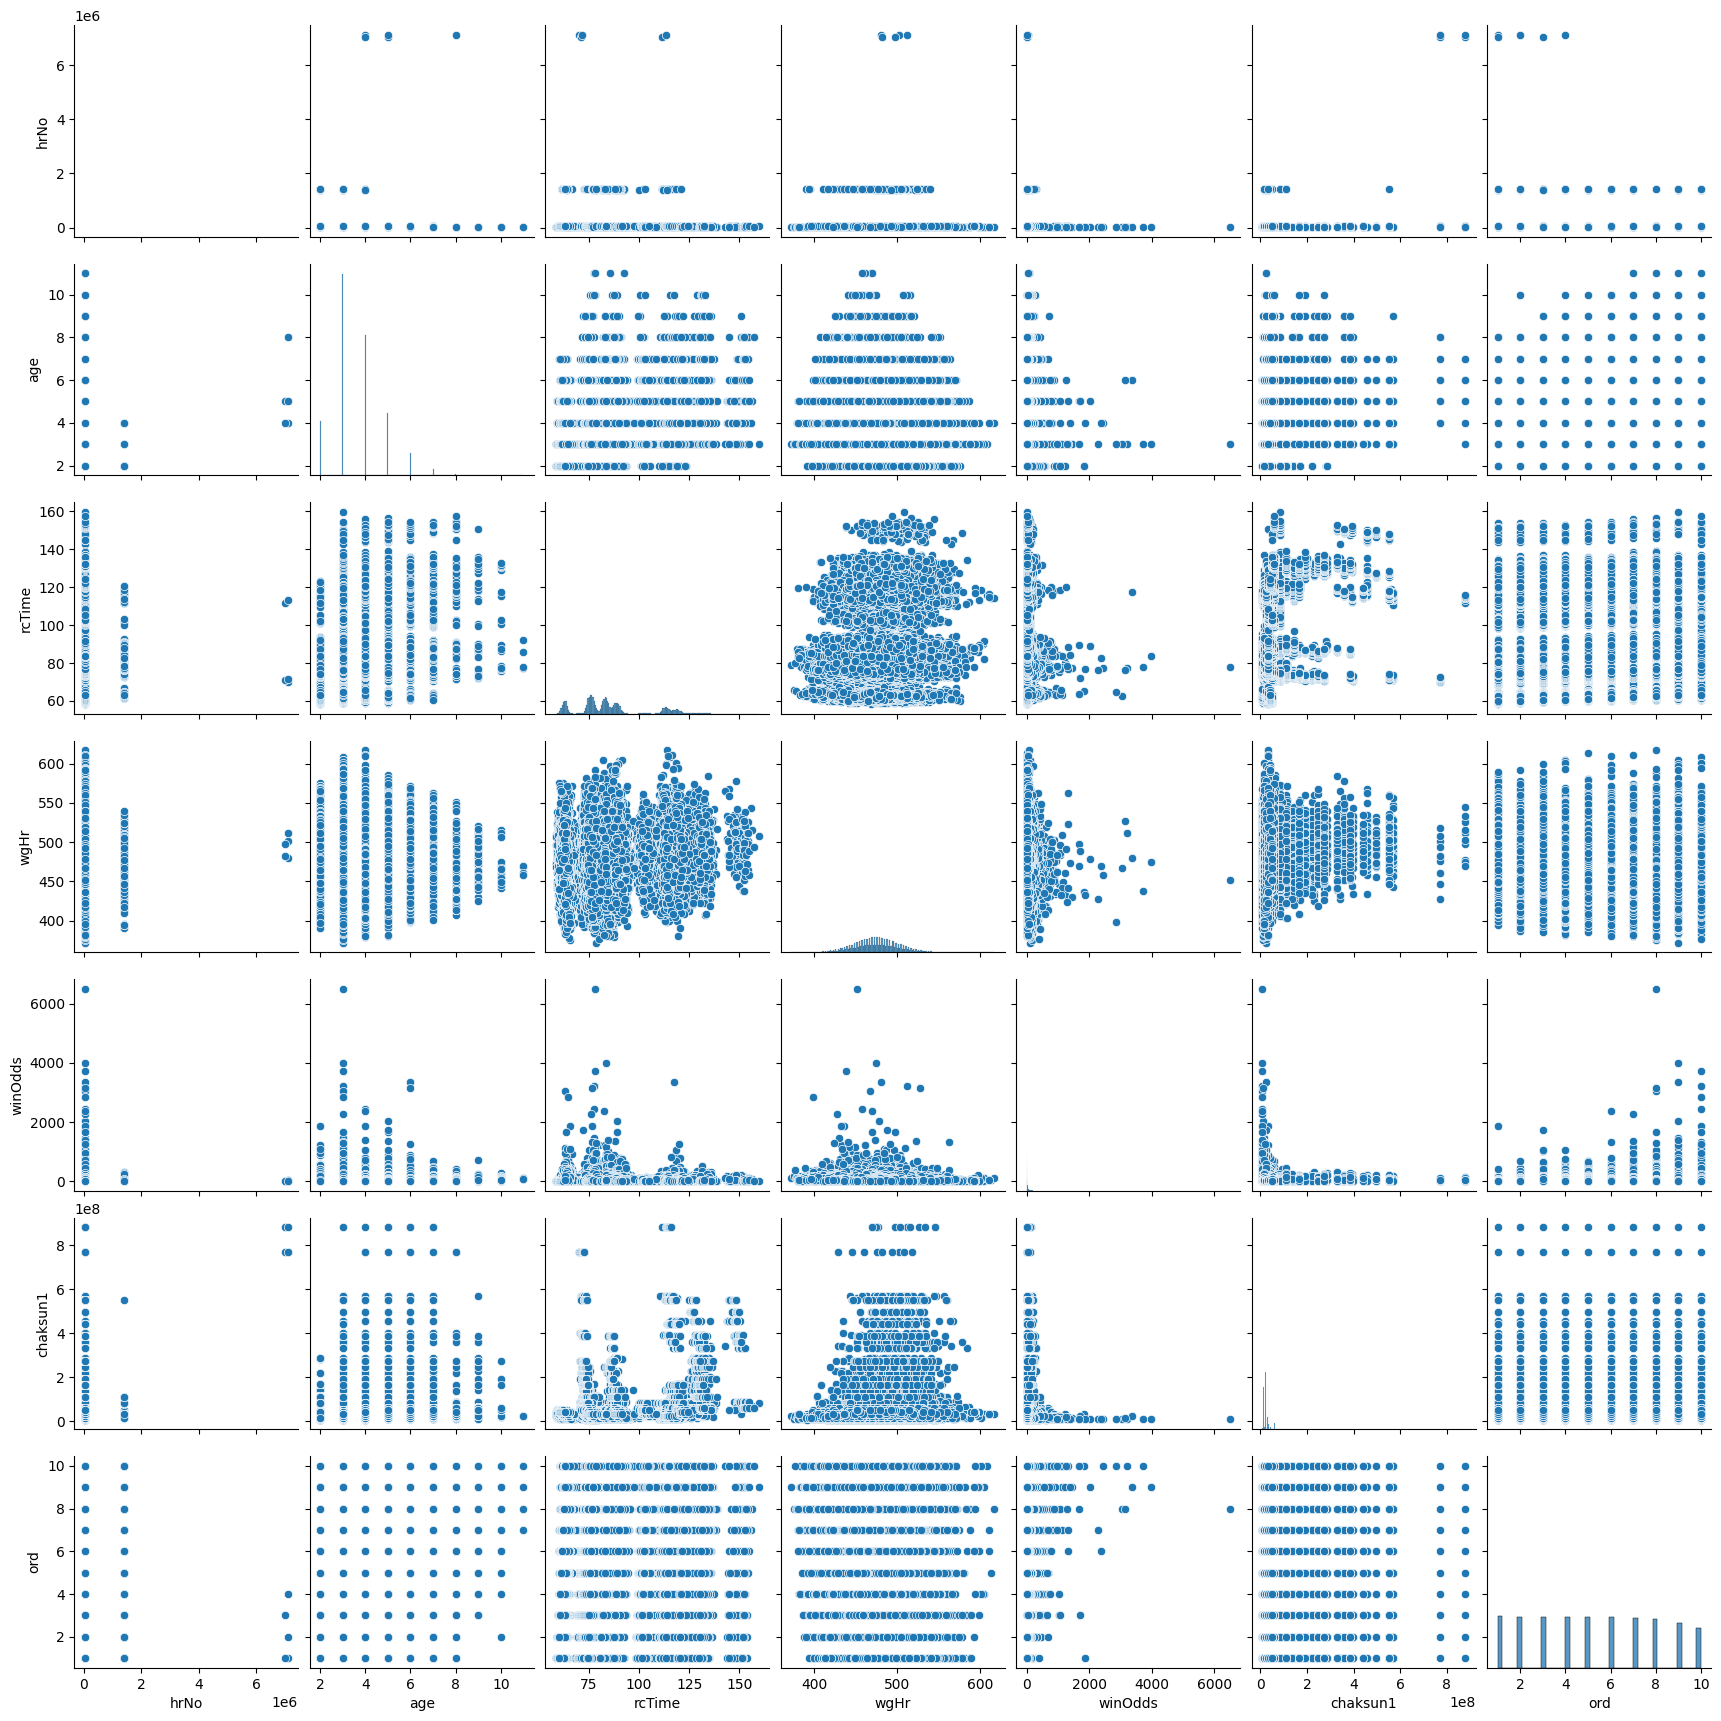

In [ ]:
sns.pairplot(df12)

In [ ]:
horse = pd.merge(left=horse_info,right=horse_train,how="left", on="hrNo")
horse['trDate'] = horse['trDate'].fillna(19000101)
horse['trDate'] = horse['trDate'].astype(int)
horse['trDate'] = horse['trDate'].astype(str)
horse['trDate'] = pd.to_datetime(horse['trDate'])
horse['DaySinceTrain'] = '0'
# race_horse=race_horse.rename(columns={'days since last train':'DaySinceTrain'})
horse['DaySinceTrain'] = (datetime.today() - horse['trDate']).dt.days
horse['DaySinceTrain'] = np.where(horse['DaySinceTrain'] > 40000, -1,horse['DaySinceTrain'])
horse
# horse['trDate'].count()
# horse.loc[horse['trDate'].notnull()]

,hrNo,hrName_x,foalgDt,gndrNm,horseCtcolNm,hrsBodyChticTxt,hrsHeadChticTxt,hrsNeckChticTxt,pctyNm,ppseNm,spcsNm,hrName_y,meet,remark,trDate,DaySinceTrain
0,3103409,-,2021-05-26(3세),암,밤,",,,,,,,","가운데이마,,,,,,,","목줄,양쪽갈기,,,,,,",한국,용도미정(휴양),제주마,NaN,NaN,NaN,1900-01-01,-1
1,3103950,-,2021-03-20(3세),암,회,",,,,,,,","가운데이마,,,,,,,","양쪽목밑,,,,,,,",한국,경주용,제주마,NaN,NaN,NaN,1900-01-01,-1
2,3103891,-,2021-04-01(3세),암,회,",,,,,,,","윗이마,,,,,,,","목밑,,,,,,,",한국,경주용,제주마,NaN,NaN,NaN,1900-01-01,-1
3,54781,AD LITEM,2022-02-05(2세),수,흑갈색,-,이마가마중,"우갈기가마, 목줄가마",미국,경주용,더러브렛,울트라선더,서울,양호,2024-05-22,8
4,54783,AWESOMETASTIC,2022-04-22(2세),수,갈색,-,"이마가마중, 유성",긴목줄가마,미국,경주용,더러브렛,정상해돋이,서울,진입불량,2024-05-10,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24060,3104170,-,2022-03-07(2세),수,갈,",,,,,,,","윗이마2,,,,,,,","긴목줄,,,,,,,",한국,경주용,제주마,NaN,NaN,NaN,1900-01-01,-1
24061,55502,SALUTE,2022-04-04(2세),수,밤색,-,"이마가마2(가로), 유성, 비량백, 비백",긴목줄가마,미국,경주용,더러브렛,NaN,NaN,NaN,1900-01-01,-1
24062,3103689,-,2021-04-26(3세),거,회,",,,,,,,","가운데이마,,,,,,,","긴목줄,,,,,,,",한국,경주용,제주마,NaN,NaN,NaN,1900-01-01,-1
24063,3104646,-,2022-05-05(2세),수,밤,",,,,,,,","가운데이마,,,,,,,","양쪽목밑,,,,,,,",한국,경주용,제주마,NaN,NaN,NaN,1900-01-01,-1


In [ ]:
race_horse = pd.merge(left=race_info,right=horse,how="left", on="hrNo")
horse['DaySinceTrain'] = horse['DaySinceTrain'].astype(int)
print(race_horse['hrNo'].count())
print(race_horse['spcsNm'].count())
race_horse.head()

145244
124347


,hrNo,hrName,age,sex,wgHr,rating,rcDate,rcDist,meet_x,track,...,hrsHeadChticTxt,hrsNeckChticTxt,pctyNm,ppseNm,spcsNm,hrName_y,meet_y,remark,trDate,DaySinceTrain
0,24091,애니위너,4,암,482,0,20121223,1300.0,서울,포화,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1,26288,레이카,3,암,481,0,20121223,1300.0,서울,포화,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
2,26331,실크포리스트,3,암,440,0,20121223,1300.0,서울,포화,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
3,26729,임자도,3,암,448,0,20121223,1300.0,서울,포화,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
4,27007,라스트러브,3,암,487,0,20121223,1300.0,서울,포화,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN


In [ ]:
# race_horse = race_horse.astype({'hrNo':'int', 'hrName':'object',  })
race_horse['hrNo'] = race_horse['hrNo'].astype(str)
race_horse['hrName'] = race_horse['hrName'].astype(str)
race_horse['age'] = race_horse['age'].astype(int)
race_horse['sex'] = race_horse['sex'].astype(str)
# race_horse['wgHr'] = race_horse['wgHr'].fillna(0)
# race_horse['wgHr'] = race_horse['wgHr'].astype(int)

race_horse['rcDate'] = race_horse['rcDate'].astype(str)
race_horse['rcDate'] = pd.to_datetime(race_horse['rcDate'])
# race_horse['DaySinceTrain'] = race_horse['DaySinceTrain'].astype(int)

# print("train null : ",race_horse['DaySinceTrain'].isnull().sum())
# print("train not null : ",race_horse['DaySinceTrain'].notnull().sum())
# print("species null : ",race_horse['spcsNm'].isnull().sum())
# print("species not null : ",race_horse['spcsNm'].notnull().sum())
# train null :  20897
# train not null :  124155
# species null :  20897
# species not null :  124155

# race_horse.dropna(subset=['spcsNm','trDate'], inplace=True)
race_horse2 = race_horse.dropna(subset=['spcsNm','trDate'])
race_horse

,hrNo,hrName,age,sex,wgHr,rating,rcDate,rcDist,meet_x,track,...,hrsHeadChticTxt,hrsNeckChticTxt,pctyNm,ppseNm,spcsNm,hrName_y,meet_y,remark,trDate,DaySinceTrain
0,24091,애니위너,4,암,482,0,2012-12-23,1300.0,서울,포화,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1,26288,레이카,3,암,481,0,2012-12-23,1300.0,서울,포화,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
2,26331,실크포리스트,3,암,440,0,2012-12-23,1300.0,서울,포화,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
3,26729,임자도,3,암,448,0,2012-12-23,1300.0,서울,포화,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
4,27007,라스트러브,3,암,487,0,2012-12-23,1300.0,서울,포화,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145239,42354,벌말대장,6,수,452,71,2024-01-06,1600.0,서울,포화,...,"이마가마상,유성,비량세백,비소백",목줄가마,한국,폐사,더러브렛,벌말대장,서울,양호,2024-03-28,63.0
145240,44553,컴플리트타임,5,암,495,72,2024-01-06,1600.0,서울,포화,...,"이마가마중, 대유성, 비량백,비백",긴목줄가마,한국,경주용,더러브렛,컴플리트타임,서울,양호,2024-05-02,28.0
145241,45147,두손멍군,6,수,479,68,2024-01-06,1600.0,서울,포화,...,"이마가마2(사선),대유성,비량대백,비대백,하순백",긴목줄가마,미국,승용,더러브렛,두손멍군,서울,양호,2024-04-25,35.0
145242,43482,문학보스,7,거,467,68,2024-01-06,1600.0,서울,포화,...,"이마가마상,유성","좌우갈기가마,목밑가마",미국,경주용,더러브렛,문학보스,서울,출발자세불량,2024-04-04,56.0


In [ ]:
race_horse.dtypes
race_horse['hrNo'] = race_horse['hrNo'].astype(int)
race_horse['rcDist'] = race_horse['rcDist'].fillna(0)
race_horse['rcDist'] = race_horse['rcDist'].astype(int)
race_horse['DaySinceTrain'] = race_horse['DaySinceTrain'].fillna(-1)
race_horse['DaySinceTrain'] = race_horse['DaySinceTrain'].astype(int)
race_horse.dtypes

hrNo                        int64
hrName                     object
age                         int64
sex                        object
wgHr                       object
rating                      int64
rcDate             datetime64[ns]
rcDist                      int64
meet_x                     object
track                      object
weather                    object
rcTime                    float64
ord                         int64
hrName_x                   object
foalgDt                    object
gndrNm                     object
horseCtcolNm               object
hrsBodyChticTxt            object
hrsHeadChticTxt            object
hrsNeckChticTxt            object
pctyNm                     object
ppseNm                     object
spcsNm                     object
hrName_y                   object
meet_y                     object
remark                     object
trDate             datetime64[ns]
DaySinceTrain               int64
dtype: object

In [ ]:
print(race_horse['rcDate'].size)
print(race_horse['rcDate'].nunique())
print(race_horse['rcDate'].value_counts().sort_index())
tempdf = race_horse['rcDate'].dt.day_name()
print(tempdf.value_counts())

145244
1148
2012-01-07    146
2012-01-08    158
2012-01-14    160
2012-01-15    146
2012-01-28    157
             ... 
2024-05-19    114
2024-05-25    114
2024-05-26     98
2024-06-01    103
2024-06-02     89
Name: rcDate, Length: 1148, dtype: int64
Saturday    72535
Sunday      70900
Friday       1580
Monday        229
Name: rcDate, dtype: int64


In [ ]:
report = create_report(race_horse, title='title')
report.save('report.html')
# report.show_browser()
# report.show()

In [ ]:
import altair as alt

In [ ]:
alt.Chart(race_horse).mark_bar().encode(
  x='mean(age)',
  y='hrNo',
  color='Origin'
)

MaxRowsError: The number of rows in your dataset is greater than the maximum allowed (5000). For information on how to plot larger datasets in Altair, see the documentation

alt.Chart(...)

In [ ]:
alt.Chart(race_horse).mark_bar().encode(
  x=alt.X('hrNo', bin=True),
  y='count()',
)

MaxRowsError: The number of rows in your dataset is greater than the maximum allowed (5000). For information on how to plot larger datasets in Altair, see the documentation

alt.Chart(...)

In [ ]:
alt.Chart(race_horse).mark_line().encode(
  x='rcDate',
  y='hrNo',
  color='symbol'
).interactive(bind_y=False)

MaxRowsError: The number of rows in your dataset is greater than the maximum allowed (5000). For information on how to plot larger datasets in Altair, see the documentation

alt.Chart(...)